# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [222]:

# student details 1: Molly F. 1888


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
  

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT (GPT-5 mini)
Goal: Guidance on installing Anaconda and Jupyter Notebook, handling missing values, deleting cells, adding databases to the notebook, and checking for errors in code.
Propmpt1: How do I install Anaconda and Jupyter Notebook?
Propmpt2: How do I fill missing values, delete cells, and add databases in my notebook?
Propmpt3: Can you help me check my code for errors and suggest corrections?
prompt 4: which models/algorithems should I check trying to solve/predict a classification problem? 
Other assistanse: I also used reffered material from "מבוא למדעי הנתונים" course
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
The learning problem is a supervised classification task where the goal is to predict whether a passenger survived the Titanic disaster based on various features, and this goal needed to be successfully accomplished. The dataset contains information about passengers. The target variable is 'Survived', which indicates if a passenger survived (1) or not (0). The dataset requires preprocessing such as handling missing values, encoding categorical variables, and normalizing numerical features to make it suitable for machine learning models.
</pre>


## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [223]:
import pandas as pd
import numpy as np             
import matplotlib.pyplot as plt  
import seaborn as sns            
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier   
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [224]:
# הצגה של המידע - מאפיינים שנעבוד איתם, מה קייםת לפני ניקוי נתונים
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


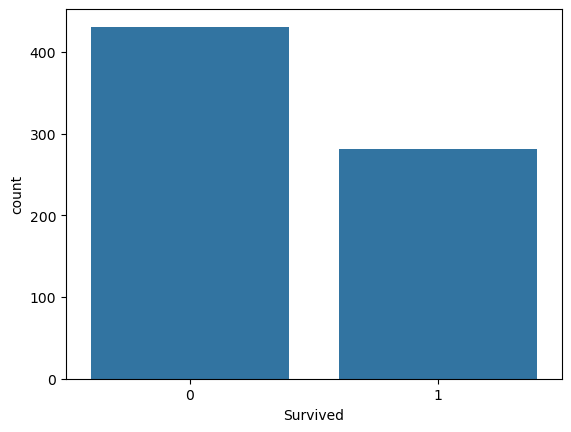

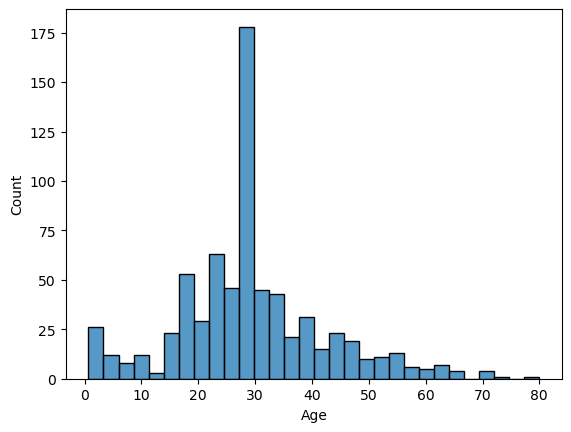

In [225]:
train_df.isnull().sum()
sns.countplot(x='Survived', data=train_df) # הצגה של מי שרד ומי לא 
plt.show()
sns.histplot(train_df['Age'].dropna(), bins=30) #הצגה של גילאים - מתוך הנחה שזה מאפיין בעל חשיבות
plt.show()

In [226]:
#ניקוי 
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df = pd.get_dummies(train_df, columns=['Sex','Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex','Embarked'], drop_first=True)
train_df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_1,Embarked_1,Embarked_2,Embarked_3
0,1,54.0,1,0,78.2667,1,False,True,False,False
1,2,45.0,0,0,13.5000,1,False,False,False,False
2,3,20.0,0,0,9.5000,0,True,False,False,False
3,3,36.0,0,0,7.8958,0,True,False,False,False
4,3,22.0,0,0,8.0500,0,True,False,False,False


In [227]:
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

## Part 3 - Experiments
You could add as many code cells as needed

In [228]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # נתונים לשימוש לאחר ניקוי בשלב קודם

In [229]:
# 1. Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100, 200],'max_depth': [None, 5, 10]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', return_train_score=True)
grid_rf.fit(X_train, y_train)
print("Random Forest - Best parameters:", grid_rf.best_params_)
print("Random Forest - Best F1 score (CV):", grid_rf.best_score_)

Random Forest - Best parameters: {'max_depth': 5, 'n_estimators': 100}
Random Forest - Best F1 score (CV): 0.7570160865400992


In [230]:
# 2. Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)

param_grid_lr = {'C': [0.1, 1, 10],'penalty': ['l2'],'solver': ['lbfgs']} #C - hyperparameter

grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1', return_train_score=True)
grid_lr.fit(X_train, y_train)

print("Logistic Regression - Best parameters:", grid_lr.best_params_)
print("Logistic Regression - Best F1 score (CV):", grid_lr.best_score_)

Logistic Regression - Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression - Best F1 score (CV): 0.7395980923882739


In [234]:
#השוואת השיטות ובחירת המודל הטוב ביותר
models = {"Random Forest": grid_rf, "Logistic Regression": grid_lr}
best_f1 = 0
best_model_name = ""
best_model = None

for name, grid in models.items():
    f1 = grid.best_score_
    print(f"F1 score for {name}: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_model_name = name
        best_model = grid.best_estimator_

print(f"the algorithem that was chosen is: {best_model_name} with F1 score = {best_f1:.4f}")

F1 score for Random Forest: 0.7570
F1 score for Logistic Regression: 0.7396
the algorithem that was chosen is: Random Forest with F1 score = 0.7570


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [235]:
best_model.fit(X_train, y_train) # אימון המודל הנבחר על כל ה-Train
y_val_pred = best_model.predict(X_val) # בדיקת ביצועים על Validation Set 
print("Validation F1 score:", f1_score(y_val, y_val_pred))

Validation F1 score: 0.7368421052631579


      Feature  Importance
5       Sex_1    0.453280
4        Fare    0.193866
1         Age    0.128857
0      Pclass    0.096289
2       SibSp    0.054918
3       Parch    0.040222
6  Embarked_1    0.022678
7  Embarked_2    0.009769
8  Embarked_3    0.000121


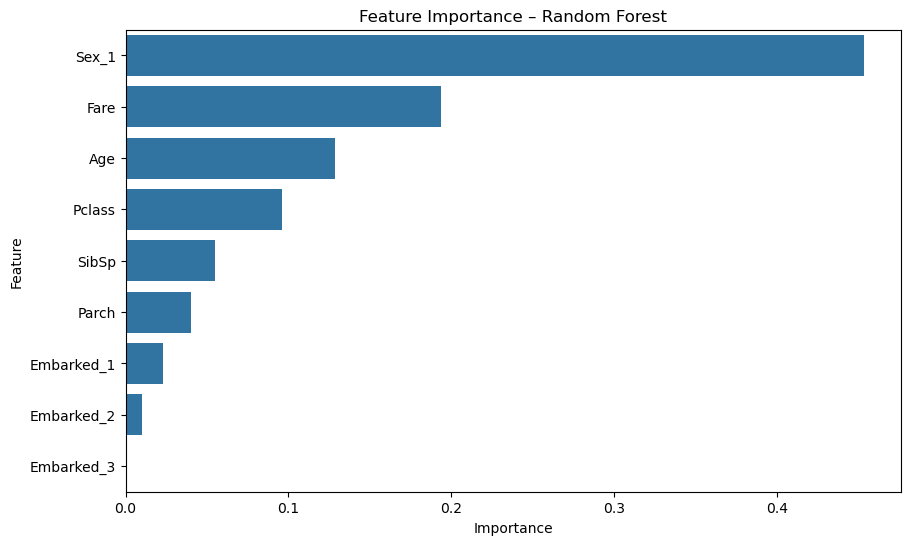

In [236]:
importances = best_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance – Random Forest")
plt.show()

## Part 5 - Apply on test and show model performance estimation

In [238]:
# יוצרים את תחזיות המודל
X_test = test_df.drop(columns=['PassengerID', 'Ticket', 'Survived'], errors='ignore')
test_pred = grid.predict(X_test)

# יוצרים DataFrame עם התחזיות
pred_df = X_test.copy()
pred_df['Survived_Pred'] = test_pred

# הערכת ביצועים על Test Set
accuracy = accuracy_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

print("Test Accuracy:", accuracy)
print("Test F1 score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))
print("Classification Report:\n", classification_report(y_test, test_pred))

# 3. עמודה עם הערך האמיתי מה-test
pred_df['Survived_Actual'] = test_df['Survived']  # הערכים האמיתיים

# 4. בוחרים את העמודות להצגה
display_df = pred_df[['Survived_Pred','Survived_Actual']]

# 5. מציגים חמש השורות הראשונות
print(display_df.head())


Test Accuracy: 0.7932960893854749
Test F1 score: 0.6890756302521008
Confusion Matrix:
 [[101  17]
 [ 20  41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       118
           1       0.71      0.67      0.69        61

    accuracy                           0.79       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179

   Survived_Pred  Survived_Actual
0              0                0
1              0                0
2              0                0
3              1                0
4              0                1
